In [ ]:
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/Econ 484/auxiliaries'

Mounted at /content/gdrive
/content/gdrive/My Drive/Econ 484/auxiliaries


#### Import some useful packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#### Load data

In [ ]:
mortgagedata=pd.read_csv('/content/gdrive/My Drive/Econ 484/datasets/mortgage.csv')
print(mortgagedata.head())
print("Shape: {}".format(str(mortgagedata.shape)))

   deny  p_irat  black  hse_inc  ...  probunmp  condo  ltv_med  ltv_high
0     0   0.217      0    0.213  ...       3.2      0        0         0
1     0   0.260      0    0.220  ...       3.9      0        1         0
2     1   0.460      0    0.270  ...       5.3      0        1         0
3     0   0.490      0    0.270  ...       3.2      0        0         0
4     0   0.260      0    0.260  ...       4.3      0        0         0

[5 rows x 16 columns]
Shape: (2380, 16)


#### Define sets of variables

In [ ]:
y = mortgagedata.loc[:,'deny']
X = mortgagedata.loc[:,['loan_val','p_irat','ccred','hse_inc','loan_val','mcred','pubrec','denpmi','selfemp','single','hischl','probunmp','condo','ltv_med']]
print('our y vector is:\n',y.head)
print('our X matrix is:\n',X.head)

our y vector is:
 <bound method NDFrame.head of 0       0
1       0
2       1
3       0
4       0
       ..
2375    0
2376    1
2377    0
2378    0
2379    0
Name: deny, Length: 2380, dtype: int64>
our X matrix is:
 <bound method NDFrame.head of       loan_val  p_irat  ccred  hse_inc  ...  hischl  probunmp  condo  ltv_med
0     0.638889  0.2170      1   0.2130  ...       1       3.2      0        0
1     0.945946  0.2600      6   0.2200  ...       1       3.9      0        1
2     0.840000  0.4600      5   0.2700  ...       1       5.3      0        1
3     0.199482  0.4900      1   0.2700  ...       1       3.2      0        0
4     0.366667  0.2600      1   0.2600  ...       1       4.3      0        0
...        ...     ...    ...      ...  ...     ...       ...    ...      ...
2375  0.438462  0.2800      1   0.2400  ...       1       3.2      1        0
2376  0.900000  0.3207      1   0.2522  ...       1       5.3      1        1
2377  0.897436  0.3810      1   0.2960  ...       1 

#### Divide into test and training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
n_test=len(y_test)
n_test

595

#### Fit logit on training set

In [ ]:
logit = LogisticRegression().fit(X_train, y_train)
#print("logit.coef_:", logit.coef_)
#print("logit.intercept_:", logit.intercept_)

#### Apply predicted probabilities to test set observations

In [ ]:
phat_test=logit.predict_proba(X_test)
# the above gives two columns, one for Pr(y=0|x) and the second for Pr(y=1|x). We just need the second
phat_test=phat_test[:,1]
phat_test

array([0.39926238, 0.10783651, 0.1479854 , 0.14758423, 0.06522223,
       0.0154494 , 0.15077708, 0.54904864, 0.02843839, 0.0632733 ,
       0.33075463, 0.11361412, 0.07017795, 0.19180996, 0.15408045,
       0.04461689, 0.07556068, 0.13369986, 0.04650183, 0.02732094,
       0.05274321, 0.05028866, 0.16287071, 0.06637971, 0.25527526,
       0.07696606, 0.06396749, 0.82516003, 0.50754111, 0.03354798,
       0.08477271, 0.0685662 , 0.0596907 , 0.07519891, 0.02898818,
       0.10444812, 0.06281322, 0.08231985, 0.24647801, 0.08422742,
       0.02932883, 0.0514859 , 0.62407705, 0.17034134, 0.03360914,
       0.05483136, 0.12021205, 0.3390985 , 0.06287525, 0.07841487,
       0.02582607, 0.106177  , 0.1042582 , 0.06821417, 0.05951342,
       0.03609764, 0.05645044, 0.05530964, 0.15636515, 0.38775215,
       0.06932983, 0.17408848, 0.0609102 , 0.05604373, 0.02561324,
       0.0487265 , 0.75356951, 0.01530376, 0.07401241, 0.03528523,
       0.06529527, 0.20472136, 0.08045481, 0.04582301, 0.11365

#### Now make classifications for a range of thresholds, $\tau$
For each value of $\tau$, calculate the false positive rate and true positive rate

In [ ]:
tpr=[0]*100
fpr=[0]*100
for i in range(100):
     tau=i/100
     yhat_test=phat_test>=tau
     tp=sum(yhat_test*y_test) 
     p=sum(y_test)
     tpr[i]=tp/p
     n=sum(1-y_test)
     fp=sum(yhat_test*(1-y_test))
     fpr[i]=fp/n

#you can also do this https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

#### Now plot true positive rate vs false positive rate

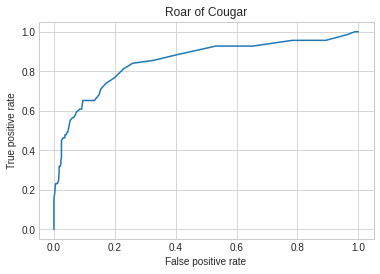

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot(fpr,tpr);
plt.title("Roar of Cougar")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate");

#### Calculate Area Under Curve (AUC)

In [ ]:
dfpr=np.array(fpr[0:99])-np.array(fpr[1:100])
AUC=sum(np.array(tpr[0:99])*dfpr)
print(AUC)

0.8609136496390587


To do on your own: repeat, but standardizing the x-variables and using Lasso to penalize the logit coefficients. Any improvement to AUC?

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #create scaler object
scaler.fit(X) #feed the scaler object the x
x_scaled = scaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, random_state=42)
n_test=len(y_test)
n_test

595

In [ ]:
p_hat_list = []
c_list = [.11,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]
for i in c_list:
  logit = LogisticRegression(C= .01,penalty='l1', solver='liblinear').fit(X_train, y_train) # c is the penalty. look up how to adjust it better in the future
  phat_test=logit.predict_proba(X_test)
  # the above gives two columns, one for Pr(y=0|x) and the second for Pr(y=1|x). We just need the second
  phat_test=phat_test[:,1]
  p_hat_list.append(phat_test)




In [ ]:
tpr=[0]*100
fpr=[0]*100
for i in range(100):
     tau=i/100
     yhat_test=phat_test>=tau
     tp=sum(yhat_test*y_test) 
     p=sum(y_test)
     tpr[i]=tp/p
     n=sum(1-y_test)
     fp=sum(yhat_test*(1-y_test))
     fpr[i]=fp/n

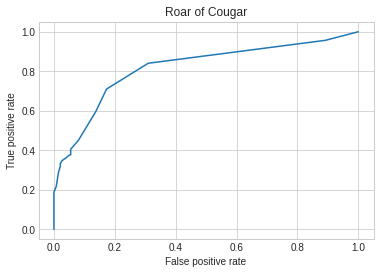

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot(fpr,tpr);
plt.title("Roar of Cougar")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate");

In [ ]:
fpr
dfpr=np.array(fpr[0:99])-np.array(fpr[1:100])
AUC=sum(np.array(tpr[0:99])*dfpr)
print(AUC)

0.8687386344850387
